# PROGETTO DM - Alessandro Bosi, Denis Bugaenco, Eleonora Zullo

## DATA ACQUISITION

### Chiamata API, connessione a MongoDB e importazione dataset su MongoDB

In [1]:
pip install "pymongo[srv]"

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import pandas as pd
from pymongo import MongoClient

In [3]:
# impostazioni aggiuntive per pandas (per visualizzare meglio gli output)
pd.set_option('display.max_columns', None)   
pd.set_option('display.max_rows', None)  

In [4]:
# scarichiamo i dati dall'API
response = requests.get('https://restcountries.com/v3.1/all')

# verifichiamo se la richiesta è andata a buon fine
if response.status_code == 200:
    countries_data = response.json()
else:
    print(f"Errore nella richiesta: {response.status_code}")
    countries_data = []

# trasformiamo i dati dell'API in un DataFrame
countries = []
for country in countries_data:
    countries.append({
        'name': country['name']['common'],
        'population': country.get('population'),
        'region': country.get('region'),
        'subregion': country.get('subregion'),
        'capital': country.get('capital', [None])[0],
        'area': country.get('area'),
        'languages': country.get('languages'),
        'borders': country.get('borders'),
        'currencies': country.get('currencies')
    })
df_countries = pd.DataFrame(countries)

# connettiamo a MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['countries_db']
collection = db['countries_collection']

# cancelliamo eventuali dati esistenti nella collezione
collection.delete_many({})

# esportiamo i dati su MongoDB
collection.insert_many(df_countries.to_dict('records'))

print("Dati esportati con successo su MongoDB!")

Dati esportati con successo su MongoDB!


### Importazione ulteriore dataset (formato csv)

In [5]:
# source 
# https://data.worldbank.org/indicator/EN.ATM.CO2E.PC

In [6]:
pollution = pd.read_csv("API_EN.ATM.CO2E.PC_DS2_en_csv_v2_540422.csv", skiprows=4)

In [7]:
pollution.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.982975,0.942212,0.907936,0.909550,0.913413,0.933001,0.943200,0.962203,0.963157,0.902134,0.891352,0.958883,0.961553,0.988083,1.032476,1.008065,0.996423,1.013249,1.053663,0.990734,1.017488,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.191389,0.180674,0.126517,0.109106,0.096638,0.088781,0.082267,0.075559,0.071270,0.058247,0.055167,0.055293,0.066810,0.073005,0.054867,0.080361,0.089757,0.109940,0.165573,0.239507,0.304230,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.470111,0.521084,0.558013,0.513859,0.462384,0.492656,0.554305,0.540062,0.506709,0.502905,0.521689,0.533552,0.486596,0.505791,0.497074,0.490734,0.452813,0.426842,0.436977,0.409795,0.447817,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,NaN,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.554941,0.545807,0.544413,0.710961,0.839266,0.914265,1.073630,1.086325,1.091173,1.109791,0.988416,0.941818,0.895717,0.924988,0.929811,0.812875,0.821264,0.811414,0.888610,0.939457,0.975917,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,NaN,NaN,NaN,NaN


## DATA PREPARATION - data cleansing

In [8]:
# Analizziamo per primo il dataset (pollution) appena caricato

In [9]:
print(pollution.head())

                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                           Indicator Name  Indicator Code  1960  1961  1962  \
0  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
1  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
2  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
3  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
4  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   

   1963  1964  1965  1966  1967  1968  1969  1970  1971  1972  1973  1974  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   N

In [10]:
pollution.shape

(266, 69)

In [11]:
pollution["Country Name"].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [12]:
# il dataset pollution è composto da 266 paesi e 69 variabili

In [13]:
# verifichiamo che le variabili "indicator name" e "indicator code" presentino lo stesso valore ripetuto per tutte le righe
# ipotesi che formuliamo analizzando il dataset con la funzione head()

In [14]:
pollution["Indicator Name"].unique()

array(['CO2 emissions (metric tons per capita)'], dtype=object)

In [15]:
pollution["Indicator Code"].unique()

array(['EN.ATM.CO2E.PC'], dtype=object)

In [16]:
# le due variabili presentano effettivamente un unico valore ripetuto per tutte le righe
# per questo motivo decidiamo di eliminare le colonne di riferimento

In [17]:
pollution = pollution.drop("Indicator Code",axis=1)

In [18]:
pollution = pollution.drop("Indicator Name",axis=1)

In [19]:
# verifichiamo di aver effettivamente eliminato le colonne

In [20]:
print(pollution.columns)

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', 'Unnamed: 68'],
      dtype='object')


In [21]:
pollution.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.982975,0.942212,0.907936,0.909550,0.913413,0.933001,0.943200,0.962203,0.963157,0.902134,0.891352,0.958883,0.961553,0.988083,1.032476,1.008065,0.996423,1.013249,1.053663,0.990734,1.017488,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.191389,0.180674,0.126517,0.109106,0.096638,0.088781,0.082267,0.075559,0.071270,0.058247,0.055167,0.055293,0.066810,0.073005,0.054867,0.080361,0.089757,0.109940,0.165573,0.239507,0.304230,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.470111,0.521084,0.558013,0.513859,0.462384,0.492656,0.554305,0.540062,0.506709,0.502905,0.521689,0.533552,0.486596,0.505791,0.497074,0.490734,0.452813,0.426842,0.436977,0.409795,0.447817,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,NaN,NaN,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.554941,0.545807,0.544413,0.710961,0.839266,0.914265,1.073630,1.086325,1.091173,1.109791,0.988416,0.941818,0.895717,0.924988,0.929811,0.812875,0.821264,0.811414,0.888610,0.939457,0.975917,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,NaN,NaN,NaN,NaN


In [22]:
# anche l'ultima colonna "Unnamed: 68" sembra assumere lo stesso valore per tutte le righe
# verifichiamo se effettivamente assume sempre lo stesso valore e procediamo ad eliminarla se l'ipotesi è verificata

In [23]:
pollution["Unnamed: 68"].unique()

array([nan])

In [24]:
# assume sempre il valore nullo, decidiamo quindi di eliminarla

In [25]:
pollution=pollution.drop("Unnamed: 68",axis=1)

In [26]:
# verifichiamo ora più precisamente dove sono gli altri valori nulli

In [27]:
print(pollution.isnull().sum())

Country Name      0
Country Code      0
1960            266
1961            266
1962            266
1963            266
1964            266
1965            266
1966            266
1967            266
1968            266
1969            266
1970            266
1971            266
1972            266
1973            266
1974            266
1975            266
1976            266
1977            266
1978            266
1979            266
1980            266
1981            266
1982            266
1983            266
1984            266
1985            266
1986            266
1987            266
1988            266
1989            266
1990             28
1991             27
1992             27
1993             27
1994             27
1995             27
1996             27
1997             27
1998             27
1999             27
2000             27
2001             27
2002             27
2003             27
2004             27
2005             27
2006             27
2007             27


In [28]:
# l'output mostra che per gli anni dal 1960 al 1989 i valori nulli sono 266
# per il 1990, i valori nulli sono 28
# per gli anni dal 1991 al 2020 i valori nulli sono 27
# mentre per gli anni dal 2021 al 2023 i valori nulli sono ancora 266

In [29]:
# sapendo che la dimensione del dataset è 266 x 49, possiamo dedurre che quando i valori nulli sono 266
# (esattamente come tutte le righe del dataset) le emissioni di CO2 non sono state registrate per nessun paese

In [30]:
# verifichiamo più precisamente quali sono i 266 valori nulli ad esempio per l'anno 2021

In [31]:
pollution[pollution["2021"].isnull()]

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.982975,0.942212,0.907936,0.909550,0.913413,0.933001,0.943200,0.962203,0.963157,0.902134,0.891352,0.958883,0.961553,0.988083,1.032476,1.008065,0.996423,1.013249,1.053663,0.990734,1.017488,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,NaN,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.191389,0.180674,0.126517,0.109106,0.096638,0.088781,0.082267,0.075559,0.071270,0.058247,0.055167,0.055293,0.066810,0.073005,0.054867,0.080361,0.089757,0.109940,0.165573,0.239507,0.304230,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,NaN,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.470111,0.521084,0.558013,0.513859,0.462384,0.492656,0.554305,0.540062,0.506709,0.502905,0.521689,0.533552,0.486596,0.505791,0.497074,0.490734,0.452813,0.426842,0.436977,0.409795,0.447817,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,NaN,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.554941,0.545807,0.544413,0.710961,0.839266,0.914265,1.073630,1.086325,1.091173,1.109791,0.988416,0.941818,0.895717,0.924988,0.929811,0.812875,0.821264,0.811414,0.888610,0.939457,0.975917,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,NaN,NaN,NaN
5,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.844035,1.261054,0.689644,0.644008,0.649938,0.612055,0.621206,0.469831,0.576804,0.960297,1.031568,1.056868,1.233002,1.361159,1.427944,1.360092,1.363989,1.433797,1.428250,1.492117,1.642762,1.768109,1.565921,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550,NaN,NaN,NaN
6,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.592152,7.336725,7.099907,6.937048,6.663237,6.754132,7.082732,7.194088,7.531924,7.812962,7.927016,7.725627,7.498765,7.238069,7.286756,7.206274,6.805400,6.890390,7.081822,6.995396,7.223591,6.957586,6.862293,6.674233,6.445931,6.485769,6.465288,6.302098,6.594057,6.287204,5.777148,NaN,NaN,NaN
7,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.799502,2.749432,2.911979,3.052821,3.149926,3.167200,3.202337,3.280785,3.224047,3.194448,3.253567,3.357638,3.396585,3.424829,3.532319,3.687724,3.787711,3.840419,4.041063,4.068963,4.208453,4.209484,4.401209,4.386231,4.439511,4.450525,4.402999,4.350684,4.222333,4.181158,3.929078,NaN,NaN,NaN
8,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.055796,30.653566,28.211854,28.615418,30.390241,30.882116,30.523276,29.656726,28.567575,27.660390,25.868851,28.138659,27.285557,27.224873,27.547774,27.202544,24.813970,22.448500,22.328149,19.645539,19.192796,19.43178

In [32]:
# l'ipotesi precedente è verificata

In [33]:
# Per questo motivo, decidiamo di eliminare le colonne che vanno dall'anno 1960 al 1989 e dal 2021 al 2023
# in quanto, come verificato precedentemente, possiedono solo valori nulli 

In [34]:
# Generiamo la lista delle colonne da eliminare
columns_to_remove_1960_1990 = [str(year) for year in range(1960, 1990)]  # dall'anno 1960 al 1989
columns_to_remove_2021_2023 = [str(year) for year in range(2021, 2024)]  # fino al 2023 incluso
columns_to_remove = columns_to_remove_1960_1990 + columns_to_remove_2021_2023

In [35]:
columns_to_remove

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '2021',
 '2022',
 '2023']

In [36]:
# Rimuoviamo le colonne specificate dal DataFrame
pollution.drop(columns=columns_to_remove, inplace=True)

In [37]:
# Verifichiamo le colonne rimanenti nel DataFrame
print(pollution.columns)

Index(['Country Name', 'Country Code', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')


In [38]:
pollution.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,0.982975,0.942212,0.907936,0.909550,0.913413,0.933001,0.943200,0.962203,0.963157,0.902134,0.891352,0.958883,0.961553,0.988083,1.032476,1.008065,0.996423,1.013249,1.053663,0.990734,1.017488,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420
2,Afghanistan,AFG,0.191389,0.180674,0.126517,0.109106,0.096638,0.088781,0.082267,0.075559,0.071270,0.058247,0.055167,0.055293,0.066810,0.073005,0.054867,0.080361,0.089757,0.109940,0.165573,0.239507,0.304230,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479
3,Africa Western and Central,AFW,0.470111,0.521084,0.558013,0.513859,0.462384,0.492656,0.554305,0.540062,0.506709,0.502905,0.521689,0.533552,0.486596,0.505791,0.497074,0.490734,0.452813,0.426842,0.436977,0.409795,0.447817,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150
4,Angola,AGO,0.554941,0.545807,0.544413,0.710961,0.839266,0.914265,1.073630,1.086325,1.091173,1.109791,0.988416,0.941818,0.895717,0.924988,0.929811,0.812875,0.821264,0.811414,0.888610,0.939457,0.975917,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743


In [39]:
print(pollution.isnull().sum())

Country Name     0
Country Code     0
1990            28
1991            27
1992            27
1993            27
1994            27
1995            27
1996            27
1997            27
1998            27
1999            27
2000            27
2001            27
2002            27
2003            27
2004            27
2005            27
2006            27
2007            27
2008            27
2009            27
2010            27
2011            27
2012            27
2013            27
2014            27
2015            27
2016            27
2017            27
2018            27
2019            27
2020            27
dtype: int64


In [40]:
# osserviamo adesso che per tutti gli anni i valori nulli sono sempre 27,
# ad eccezione del 1990 in cui i valori nulli sono 28

In [41]:
# analizziamo ad esempio quali sono i valori nulli per il 1991
pollution[pollution["1991"].isnull()]

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Bermuda,BMU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,Channel Islands,CHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Curacao,CUW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,Cayman Islands,CYM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,Faroe Islands,FRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Gibraltar,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Greenland,GRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,Guam,GUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# l'output mostra che i 27 paesi con valori nulli per gli anni evidenziati precedentemente sono sempre gli stessi

In [43]:
# verifichiamo però quale paese invece possiede un valore nullo per il 1990 ma non per gli altri anni
# i valori nulli per il 1990 erano infatti 28

In [44]:
pollution[pollution["1990"].isnull()]

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Bermuda,BMU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,Channel Islands,CHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Curacao,CUW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,Cayman Islands,CYM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,Faroe Islands,FRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Gibraltar,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Greenland,GRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,Guam,GUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# l'output mostra che questo paese è la Namibia (indice 171)

In [46]:
# poichè la Namibia presenta un valore nullo solo per l'anno 1990 e non per gli altri anni,
# decidiamo di prevedere l'emissione di CO2 nel 1990 attraverso una regressione lineare

In [47]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [48]:
pollution_r = pollution.dropna()

In [49]:
X = pollution_r.loc[:, '1991':'2020']
X

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,0.942212,0.907936,0.909550,0.913413,0.933001,0.943200,0.962203,0.963157,0.902134,0.891352,0.958883,0.961553,0.988083,1.032476,1.008065,0.996423,1.013249,1.053663,0.990734,1.017488,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420
2,0.180674,0.126517,0.109106,0.096638,0.088781,0.082267,0.075559,0.071270,0.058247,0.055167,0.055293,0.066810,0.073005,0.054867,0.080361,0.089757,0.109940,0.165573,0.239507,0.304230,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479
3,0.521084,0.558013,0.513859,0.462384,0.492656,0.554305,0.540062,0.506709,0.502905,0.521689,0.533552,0.486596,0.505791,0.497074,0.490734,0.452813,0.426842,0.436977,0.409795,0.447817,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150
4,0.545807,0.544413,0.710961,0.839266,0.914265,1.073630,1.086325,1.091173,1.109791,0.988416,0.941818,0.895717,0.924988,0.929811,0.812875,0.821264,0.811414,0.888610,0.939457,0.975917,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743
5,1.261054,0.689644,0.644008,0.649938,0.612055,0.621206,0.469831,0.576804,0.960297,1.031568,1.056868,1.233002,1.361159,1.427944,1.360092,1.363989,1.433797,1.428250,1.492117,1.642762,1.768109,1.565921,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550
6,7.336725,7.099907,6.937048,6.663237,6.754132,7.082732,7.194088,7.531924,7.812962,7.927016,7.725627,7.498765,7.238069,7.286756,7.206274,6.805400,6.890390,7.081822,6.995396,7.223591,6.957586,6.862293,6.674233,6.445931,6.485769,6.465288,6.302098,6.594057,6.287204,5.777148
7,2.749432,2.911979,3.052821,3.149926,3.167200,3.202337,3.280785,3.224047,3.194448,3.253567,3.357638,3.396585,3.424829,3.532319,3.687724,3.787711,3.840419,4.041063,4.068963,4.208453,4.209484,4.401209,4.386231,4.439511,4.450525,4.402999,4.350684,4.222333,4.181158,3.929078
8,30.653566,28.211854,28.615418,30.390241,30.882116,30.523276,29.656726,28.567575,27.660390,25.868851,28.138659,27.285557,27.224873,27.547774,27.202544,24.813970,22.448500,22.328149,19.645539,19.192796,19.431780,20.275652,21.133916,21.122774,21.914502,22.280703,21.165498,19.060950,20.153345,20.252272
9,3.199038,3.214972,3.240242,3.244828,3.230308,3.462789,3.521298,3.661557,3.669601,3.567918,3.341877,3.100489,3.334891,3.656085,3.736717,3.924262,4.083151,4.152375,3.848348,4.099844,4.281028,4.264111,4.342250,4.209112,4.301914,4.201816,4.070112,3.975651,3.742030,3.405618
10,5.719102,3.009035,1.438816,0.802638,1.034302,0.752345,1.016165,1.077749,0.967864,1.123867,1.149648,1.004400,1.133361,1.227695,1.463912,1.483304,1.732263,1.905698,1.521710,1.471883,1.685606,1.961453,1.896163,1.895894,1.856253,1.767966,1.883396,2.013779,2.196552,2.404684


In [50]:
Y = pollution_r['1990']
Y

1       0.982975
2       0.191389
3       0.470111
4       0.554941
5       1.844035
6       7.592152
7       2.799502
8      29.055796
9       3.073563
10      5.579919
12      3.445553
13     15.437183
14      7.590107
15      7.453966
16      0.034210
17     10.967036
18      0.064306
19      0.065061
20      0.107550
21      8.442677
22     20.752003
23      7.442764
24      5.332431
25      9.797487
26      1.863749
28      1.466688
29      1.313132
30      3.879661
31     12.447314
32      0.331977
33      2.092773
34      0.052684
35     15.148969
36      8.950861
37      6.451698
39      2.288384
40      1.914546
41      0.227143
42      0.253707
43      0.088336
44      1.341956
45      1.514181
46      0.151930
47      0.504165
48      0.909110
49      4.571799
50      3.352091
53      5.822701
54     14.820869
55     12.026580
56      0.474901
57      0.902405
58     10.110604
59      1.102636
60      2.466366
61      1.664938
62      1.279994
63      2.377152
64     10.6063

In [51]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [52]:
namibia_data = pollution[pollution['Country Name'] == 'Namibia']
namibia_data

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
171,Namibia,NAM,NaN,0.789691,0.833352,0.936924,1.04989,1.104667,1.165832,1.165516,1.162243,1.112875,1.067702,1.324982,1.128712,1.184489,1.225478,1.28664,1.254079,1.266175,1.437246,1.450782,1.47837,1.549378,1.6182,1.706683,1.753053,1.812456,1.787073,1.786399,1.778832,1.764172,1.588045


In [53]:
namibia_data = namibia_data.drop(columns = ['Country Name', 'Country Code', '1990'])

In [54]:
model.predict(namibia_data)

array([0.93147404])

In [55]:
new_value_1990 = 0.93147404

In [56]:
index_namibia = pollution[pollution['Country Name'] == "Namibia"].index

In [57]:
if not index_namibia.empty:
    pollution.loc[index_namibia, '1990'] = new_value_1990
    print("OK")
else:
    print("NO")

OK


In [58]:
pollution[pollution['Country Name'] == 'Namibia']

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
171,Namibia,NAM,0.931474,0.789691,0.833352,0.936924,1.04989,1.104667,1.165832,1.165516,1.162243,1.112875,1.067702,1.324982,1.128712,1.184489,1.225478,1.28664,1.254079,1.266175,1.437246,1.450782,1.47837,1.549378,1.6182,1.706683,1.753053,1.812456,1.787073,1.786399,1.778832,1.764172,1.588045


In [59]:
# non procediamo ad eliminare i paesi che non presentano rilevazioni di emissioni di CO2 per nessun anno
# per poter procedere più facilmente successivamente nella fase di integrazione dei due dataset
# rimuovere alcuni paesi adesso, non permetterebbe infatti di individuare correttamente i match nella fase successiva

## DATA PREPARATION - data integration

In [60]:
# Connessione a MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['countries_db']
collection = db['countries_collection']

In [61]:
# Carichiamo i dati da MongoDB in un DataFrame
data_from_mongo = pd.DataFrame(list(collection.find()))

In [62]:
print(data_from_mongo.head())

                        _id               name  population   region  \
0  6685b02f4646daa6c8f6012f  Wallis and Futuna       11750  Oceania   
1  6685b02f4646daa6c8f60130            Iceland      366425   Europe   
2  6685b02f4646daa6c8f60131         Luxembourg      632275   Europe   
3  6685b02f4646daa6c8f60132               Mali    20250834   Africa   
4  6685b02f4646daa6c8f60133            Comoros      869595   Africa   

         subregion     capital       area  \
0        Polynesia    Mata-Utu      142.0   
1  Northern Europe   Reykjavik   103000.0   
2   Western Europe  Luxembourg     2586.0   
3   Western Africa      Bamako  1240192.0   
4   Eastern Africa      Moroni     1862.0   

                                           languages  \
0                                  {'fra': 'French'}   
1                               {'isl': 'Icelandic'}   
2  {'deu': 'German', 'fra': 'French', 'ltz': 'Lux...   
3                                  {'fra': 'French'}   
4  {'ara': 'Arabic', '

In [63]:
# Analizziamo il dataset di mongo

In [64]:
data_from_mongo.name

0                                 Wallis and Futuna
1                                           Iceland
2                                        Luxembourg
3                                              Mali
4                                           Comoros
5                                         Australia
6                                           Estonia
7                                            Canada
8                                           Belarus
9                                            Guyana
10                                           Gambia
11                                          Tunisia
12                                         Cameroon
13                                           Rwanda
14                                         Cambodia
15                                            Benin
16                                           Greece
17                                      South Korea
18                                        Mauritius
19          

In [65]:
data_from_mongo.shape

(250, 10)

In [66]:
pollution["Country Name"]

0                                                  Aruba
1                            Africa Eastern and Southern
2                                            Afghanistan
3                             Africa Western and Central
4                                                 Angola
5                                                Albania
6                                                Andorra
7                                             Arab World
8                                   United Arab Emirates
9                                              Argentina
10                                               Armenia
11                                        American Samoa
12                                   Antigua and Barbuda
13                                             Australia
14                                               Austria
15                                            Azerbaijan
16                                               Burundi
17                             

In [67]:
pollution.shape

(266, 33)

In [68]:
# Notiamo che le dimensioni dei due dataset sono diverse
# verifichiamo quindi quali sono i valori che non sono comuni nei due dataset
# poiché l'operazione di integrazione dei due dataset verrà fatta utilizzando la variabile che rappresenta
# il nome del paese, ci focalizziamo sulle differenze relative a questa variabile

In [69]:
diversi = pollution[~pollution['Country Name'].isin(data_from_mongo['name'])]
diversi

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Africa Eastern and Southern,AFE,0.982975,0.942212,0.907936,0.909550,0.913413,0.933001,0.943200,0.962203,0.963157,0.902134,0.891352,0.958883,0.961553,0.988083,1.032476,1.008065,0.996423,1.013249,1.053663,0.990734,1.017488,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420
3,Africa Western and Central,AFW,0.470111,0.521084,0.558013,0.513859,0.462384,0.492656,0.554305,0.540062,0.506709,0.502905,0.521689,0.533552,0.486596,0.505791,0.497074,0.490734,0.452813,0.426842,0.436977,0.409795,0.447817,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150
7,Arab World,ARB,2.799502,2.749432,2.911979,3.052821,3.149926,3.167200,3.202337,3.280785,3.224047,3.194448,3.253567,3.357638,3.396585,3.424829,3.532319,3.687724,3.787711,3.840419,4.041063,4.068963,4.208453,4.209484,4.401209,4.386231,4.439511,4.450525,4.402999,4.350684,4.222333,4.181158,3.929078
23,"Bahamas, The",BHS,7.442764,7.553847,6.924422,6.333546,6.291221,6.423550,6.213496,5.466984,6.597061,6.642479,6.508335,6.172147,6.193975,6.251293,6.105413,5.622707,5.406279,5.400849,5.460935,5.457035,5.302835,5.775896,6.266800,7.274472,6.473141,5.621128,5.153595,5.438825,6.955358,6.482894,6.042251
31,Brunei Darussalam,BRN,12.447314,12.541688,12.924273,13.796701,14.609759,15.381966,15.765066,16.682471,14.111734,13.554710,14.128579,13.819010,13.296668,15.578528,14.156871,13.610768,20.173387,18.860034,20.575035,20.174425,18.105658,18.262990,17.951032,17.509752,16.993155,15.180679,16.358212,16.943078,17.362310,16.111933,21.705812
36,Central Europe and the Baltics,CEB,8.950861,8.294582,7.725797,7.508530,7.321380,7.365827,7.618700,7.398846,6.959340,6.582622,6.552228,6.711432,6.616509,6.904833,6.913282,6.931863,7.122723,7.201061,7.050765,6.534136,6.784218,6.810707,6.564899,6.323538,6.139710,6.244133,6.376606,6.658388,6.616508,6.285364,5.857206
38,Channel Islands,CHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Cote d'Ivoire,CIV,0.227143,0.225680,0.215924,0.222079,0.224137,0.235326,0.273689,0.324255,0.314629,0.417928,0.386281,0.376580,0.386730,0.292971,0.294749,0.309775,0.293837,0.285492,0.319826,0.291676,0.300691,0.283742,0.365172,0.386857,0.399943,0.415553,0.396203,0.425137,0.399890,0.414528,0.406347
43,"Congo, Dem. Rep.",COD,0.088336,0.046724,0.038673,0.047907,0.053195,0.048768,0.051482,0.050644,0.049585,0.044425,0.033629,0.031242,0.031942,0.037564,0.035386,0.039057,0.039101,0.041015,0.041017,0.038942,0.039974,0.043943,0.039822,0.053900,0.067549,0.041082,0.029732,0.033755,0.032311,0.033715,0.032585
44,"Congo, Rep.",COG,1.341956,1.302015,1.240866,1.037130,0.769775,0.960800,1.124777,1.136063,1.319537,1.313307,1.387028,1.304047,0.827100,0.941672,0.991953,1.174359,1.252965,1.049134,1.066263,1.136551,1.222058,1.174458,1.116160,1.100153,1.046561,1.116621,1.059916,1.017762,1.142589,1.257662,1.254592


In [70]:
diversi2 = data_from_mongo[~data_from_mongo['name'].isin(pollution['Country Name'])]
diversi2

,_id,name,population,region,subregion,capital,area,languages,borders,currencies
0,6685b02f4646daa6c8f6012f,Wallis and Futuna,11750,Oceania,Polynesia,Mata-Utu,142.00,{'fra': 'French'},None,"{'XPF': {'name': 'CFP franc', 'symbol': '₣'}}"
10,6685b02f4646daa6c8f60139,Gambia,2416664,Africa,Western Africa,Banjul,10689.00,{'eng': 'English'},[SEN],"{'GMD': {'name': 'dalasi', 'symbol': 'D'}}"
17,6685b02f4646daa6c8f60140,South Korea,51780579,Asia,Eastern Asia,Seoul,100210.00,{'kor': 'Korean'},[PRK],"{'KRW': {'name': 'South Korean won', 'symbol':..."
19,6685b02f4646daa6c8f60142,United States Virgin Islands,106290,Americas,Caribbean,Charlotte Amalie,347.00,{'eng': 'English'},None,"{'USD': {'name': 'United States dollar', 'symb..."
20,6685b02f4646daa6c8f60143,Åland Islands,29458,Europe,Northern Europe,Mariehamn,1580.00,{'swe': 'Swedish'},None,"{'EUR': {'name': 'Euro', 'symbol': '€'}}"
25,6685b02f4646daa6c8f60148,Egypt,102334403,Africa,Northern Africa,Cairo,1002450.00,{'ara': 'Arabic'},"[ISR, LBY, PSE, SDN]","{'EGP': {'name': 'Egyptian pound', 'symbol': '..."
29,6685b02f4646daa6c8f6014c,Cape Verde,555988,Africa,Western Africa,Praia,4033.00,{'por': 'Portuguese'},None,"{'CVE': {'name': 'Cape Verdean escudo', 'symbo..."
32,6685b02f4646daa6c8f6014f,Slovakia,5458827,Europe,Central Europe,Bratislava,49037.00,{'slk': 'Slovak'},"[AUT, CZE, HUN, POL, UKR]","{'EUR': {'name': 'Euro', 'symbol': '€'}}"
34,6685b02f4646daa6c8f60151,Laos,7275556,Asia,South-Eastern Asia,Vientiane,236800.00,{'lao': 'Lao'},"[MMR, KHM, CHN, THA, VNM]","{'LAK': {'name': 'Lao kip', 'symbol': '₭'}}"
36,6685b02f4646daa6c8f60153,Niue,1470,Oceania,Polynesia,Alofi,260.00,"{'eng': 'English', 'niu': 'Niuean'}",None,"{'NZD': {'name': 'New Zealand dollar', 'symbol..."


In [71]:
# prima di procedere con l'integrazione dei due dataset (operazione che verrà fatta utilizzando il nome del paese
# come primary key) verifichiamo l'effettiva corrispondenza tra le due colonne dei due dataset in cui viene indicato
# il nome del paese

In [72]:
# in quanto la corrispondenza tra le due variabili potrebbe essere approsimata e non esatta (es: Congo - Congo, Rep.), 
# decidiamo di analizzare meglio questo aspetto creando un accuracy score 

In [73]:
# per prima cosa sostituiamo i caratteri speciali con controparti ASCII (nelle variabili di interesse)
# per rendere più immediato il processo di matching

In [74]:
from unidecode import unidecode

In [75]:
data_from_mongo['name'] = data_from_mongo['name'].apply(unidecode)

In [76]:
data_from_mongo['name']

0                                 Wallis and Futuna
1                                           Iceland
2                                        Luxembourg
3                                              Mali
4                                           Comoros
5                                         Australia
6                                           Estonia
7                                            Canada
8                                           Belarus
9                                            Guyana
10                                           Gambia
11                                          Tunisia
12                                         Cameroon
13                                           Rwanda
14                                         Cambodia
15                                            Benin
16                                           Greece
17                                      South Korea
18                                        Mauritius
19          

In [77]:
data_from_mongo[data_from_mongo['name'] == 'Curacao']

,_id,name,population,region,subregion,capital,area,languages,borders,currencies
56,6685b02f4646daa6c8f60167,Curacao,155014,Americas,Caribbean,Willemstad,444.0,"{'eng': 'English', 'nld': 'Dutch', 'pap': 'Pap...",None,{'ANG': {'name': 'Netherlands Antillean guilde...


In [78]:
# ora il processo di match dovrebbe essere più accurato

In [79]:
pip install fuzzywuzzy python-Levenshtein

Note: you may need to restart the kernel to use updated packages.


In [80]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [81]:
# trasformiamo le due colonne di interesse in liste
col_mongo = data_from_mongo["name"].tolist()
col_pollution = pollution["Country Name"].tolist()

In [82]:
matches=[]
for i in col_mongo:
    match=process.extractOne(i,col_pollution,scorer=fuzz.token_sort_ratio)
    matches.append((i,match[0],match[1]))

In [83]:
# creiamo un nuovo dataframe in cui vengono raccolte le possibili corrispondenze tra le due colonne
matches_df = pd.DataFrame(matches,columns=["Col_mongo","Best match in column pollution","Accuracy score"])

In [84]:
matches_df

,Col_mongo,Best match in column pollution,Accuracy score
0,Wallis and Futuna,West Bank and Gaza,51
1,Iceland,Iceland,100
2,Luxembourg,Luxembourg,100
3,Mali,Mali,100
4,Comoros,Comoros,100
5,Australia,Australia,100
6,Estonia,Estonia,100
7,Canada,Canada,100
8,Belarus,Belarus,100
9,Guyana,Guyana,100


In [85]:
matches_df.shape     # deve essere come il dataset di mongo

(250, 3)

In [86]:
# per prima cosa, osserviamo quanti paesi hanno effettivamente una corrispondenza nei due dataset
# quindi, quando l'accuracy score = 100

In [87]:
matches_df[matches_df["Accuracy score"] == 100].count()

Col_mongo                         186
Best match in column pollution    186
Accuracy score                    186
dtype: int64

In [88]:
# 186 paesi su 250 sono matchati correttamente

In [89]:
# Osserviamo i paesi per i quali l'accuracy score non è 100
# quando è 100 possiamo infatti essere sicuri che la corrsipondenza è perfetta
# dovrebbero essere 64 (250-186)

In [90]:
matches_df_wrong = matches_df[matches_df["Accuracy score"] != 100].sort_values(by="Accuracy score", ascending=False).reset_index(drop=True)
matches_df_wrong

,Col_mongo,Best match in column pollution,Accuracy score
0,Saint Vincent and the Grenadines,St. Vincent and the Grenadines,95
1,Saint Kitts and Nevis,St. Kitts and Nevis,92
2,Venezuela,"Venezuela, RB",86
3,Saint Lucia,St. Lucia,84
4,Gambia,Zambia,83
5,Saint Martin,San Marino,82
6,DR Congo,"Congo, Rep.",82
7,Aland Islands,Cayman Islands,81
8,Cape Verde,Cabo Verde,80
9,Bahamas,"Bahamas, The",78


In [91]:
matches_df_wrong.shape

(64, 3)

In [92]:
# Procediamo ora con un'ispezione visuale dei match ed eliminiamo i match errati

In [93]:
# In seguito all'ispezione abbiamo individuato un insieme di paesi che non hanno trovato il corrispettivo match
# e la Corea del Sud che è stata confusa con quella del Nord

In [94]:
# Definiamo quindi, partendo dall'output precedente, la lista degli indici dei paesi che vogliamo mantenere
indices_to_keep = [0,1,2,3,6,8,9,10,12,21,25,28,36,44,59]

In [95]:
correct_matches = matches_df_wrong.loc[indices_to_keep]
correct_matches 

,Col_mongo,Best match in column pollution,Accuracy score
0,Saint Vincent and the Grenadines,St. Vincent and the Grenadines,95
1,Saint Kitts and Nevis,St. Kitts and Nevis,92
2,Venezuela,"Venezuela, RB",86
3,Saint Lucia,St. Lucia,84
6,DR Congo,"Congo, Rep.",82
8,Cape Verde,Cabo Verde,80
9,Bahamas,"Bahamas, The",78
10,United States Virgin Islands,Virgin Islands (U.S.),78
12,Turkey,Turkiye,77
21,Yemen,"Yemen, Rep.",71


In [96]:
correct_matches.shape

(15, 3)

In [97]:
# procediamo poi ad inserire una riga in correct_matches per il match relativo alla Corea del Sud

In [98]:
new_row = {
    'Col_mongo': 'South Korea',
    'Best match in column pollution': 'Korea, Rep.',
    'Accuracy score': 0
}

In [99]:
correct_matches.loc[len(correct_matches)] = new_row

In [100]:
correct_matches

,Col_mongo,Best match in column pollution,Accuracy score
0,Saint Vincent and the Grenadines,St. Vincent and the Grenadines,95
1,Saint Kitts and Nevis,St. Kitts and Nevis,92
2,Venezuela,"Venezuela, RB",86
3,Saint Lucia,St. Lucia,84
6,DR Congo,"Congo, Rep.",82
8,Cape Verde,Cabo Verde,80
9,Bahamas,"Bahamas, The",78
10,United States Virgin Islands,Virgin Islands (U.S.),78
12,Turkey,Turkiye,77
21,Yemen,"Yemen, Rep.",71


In [101]:
correct_matches.shape

(16, 3)

In [102]:
# Procediamo adesso a cambiare il nome dei paesi nella colonna del dataset di mongo 
# per poter procedere con il merge successivamente quando verranno integrati i due dataset

In [103]:
# Creiamo il dizionario di mappatura da 'correct_matches'
mapping_dict = dict(zip(correct_matches['Col_mongo'], correct_matches['Best match in column pollution']))

In [104]:
# Applichiamo la mappatura al DataFrame 'data_from_mongo'
data_from_mongo['name'] = data_from_mongo['name'].map(mapping_dict).fillna(data_from_mongo['name'])

In [105]:
data_from_mongo

,_id,name,population,region,subregion,capital,area,languages,borders,currencies
0,6685b02f4646daa6c8f6012f,Wallis and Futuna,11750,Oceania,Polynesia,Mata-Utu,142.00,{'fra': 'French'},None,"{'XPF': {'name': 'CFP franc', 'symbol': '₣'}}"
1,6685b02f4646daa6c8f60130,Iceland,366425,Europe,Northern Europe,Reykjavik,103000.00,{'isl': 'Icelandic'},None,"{'ISK': {'name': 'Icelandic króna', 'symbol': ..."
2,6685b02f4646daa6c8f60131,Luxembourg,632275,Europe,Western Europe,Luxembourg,2586.00,"{'deu': 'German', 'fra': 'French', 'ltz': 'Lux...","[BEL, FRA, DEU]","{'EUR': {'name': 'Euro', 'symbol': '€'}}"
3,6685b02f4646daa6c8f60132,Mali,20250834,Africa,Western Africa,Bamako,1240192.00,{'fra': 'French'},"[DZA, BFA, GIN, CIV, MRT, NER, SEN]","{'XOF': {'name': 'West African CFA franc', 'sy..."
4,6685b02f4646daa6c8f60133,Comoros,869595,Africa,Eastern Africa,Moroni,1862.00,"{'ara': 'Arabic', 'fra': 'French', 'zdj': 'Com...",None,"{'KMF': {'name': 'Comorian franc', 'symbol': '..."
5,6685b02f4646daa6c8f60134,Australia,25687041,Oceania,Australia and New Zealand,Canberra,7692024.00,{'eng': 'English'},None,"{'AUD': {'name': 'Australian dollar', 'symbol'..."
6,6685b02f4646daa6c8f60135,Estonia,1331057,Europe,Northern Europe,Tallinn,45227.00,{'est': 'Estonian'},"[LVA, RUS]","{'EUR': {'name': 'Euro', 'symbol': '€'}}"
7,6685b02f4646daa6c8f60136,Canada,38005238,Americas,North America,Ottawa,9984670.00,"{'eng': 'English', 'fra': 'French'}",[USA],"{'CAD': {'name': 'Canadian dollar', 'symbol': ..."
8,6685b02f4646daa6c8f60137,Belarus,9398861,Europe,Eastern Europe,Minsk,207600.00,"{'bel': 'Belarusian', 'rus': 'Russian'}","[LVA, LTU, POL, RUS, UKR]","{'BYN': {'name': 'Belarusian ruble', 'symbol':..."
9,6685b02f4646daa6c8f60138,Guyana,786559,Americas,South America,Georgetown,214969.00,{'eng': 'English'},"[BRA, SUR, VEN]","{'GYD': {'name': 'Guyanese dollar', 'symbol': ..."


In [106]:
data_from_mongo.shape

(250, 10)

In [107]:
# quando non c'è il match tra i due paesi avremo un valore nullo in "Country Name"

In [108]:
# adesso che i nomi dei paesi sono stati cambiati correttamente, 
# possiamo procedere con l'integrazione dei due dataframe utilizzando come primary key il nome del paese

In [109]:
combined_data = pd.merge(data_from_mongo, pollution, left_on='name', right_on='Country Name', how = 'inner')

In [110]:
combined_data.shape

(202, 43)

In [111]:
# NOTA BENE: 202 = 186 (matchati correttamente - accuracy score = 100) + 16 (matchati da noi)

In [112]:
combined_data

,_id,name,population,region,subregion,capital,area,languages,borders,currencies,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,6685b02f4646daa6c8f60130,Iceland,366425,Europe,Northern Europe,Reykjavik,103000.00,{'isl': 'Icelandic'},None,"{'ISK': {'name': 'Icelandic króna', 'symbol': ...",Iceland,ISL,7.642313,7.424369,7.449714,7.521661,7.858928,7.481792,8.429101,7.944476,7.857703,7.626297,7.913942,7.591344,7.803793,7.689978,7.908920,7.620461,7.610227,7.648363,6.876288,6.618545,6.159973,5.919333,5.799212,6.275559,6.254085,6.219488,4.868247,4.866045,4.817689,4.543450,3.947465
1,6685b02f4646daa6c8f60131,Luxembourg,632275,Europe,Western Europe,Luxembourg,2586.00,"{'deu': 'German', 'fra': 'French', 'ltz': 'Lux...","[BEL, FRA, DEU]","{'EUR': {'name': 'Euro', 'symbol': '€'}}",Luxembourg,LUX,29.553490,30.370543,29.159176,29.298195,26.830303,21.192781,21.091919,19.650018,17.813751,18.398978,19.611964,20.652285,22.005491,22.676970,25.452799,25.610438,24.791119,23.155338,22.557045,20.978820,21.755666,21.041503,20.148942,18.722946,17.333940,16.034649,15.198775,15.103063,15.331524,15.323040,12.456953
2,6685b02f4646daa6c8f60132,Mali,20250834,Africa,Western Africa,Bamako,1240192.00,{'fra': 'French'},"[DZA, BFA, GIN, CIV, MRT, NER, SEN]","{'XOF': {'name': 'West African CFA franc', 'sy...",Mali,MLI,0.048743,0.048367,0.051252,0.054360,0.058323,0.061686,0.065859,0.071915,0.090015,0.091509,0.097321,0.103325,0.104035,0.103653,0.113802,0.113865,0.116101,0.130489,0.138587,0.129312,0.138707,0.146305,0.152028,0.165467,0.180859,0.184609,0.182277,0.187962,0.194032,0.191439,0.195566
3,6685b02f4646daa6c8f60133,Comoros,869595,Africa,Eastern Africa,Moroni,1862.00,"{'ara': 'Arabic', 'fra': 'French', 'zdj': 'Com...",None,"{'KMF': {'name': 'Comorian franc', 'symbol': '...",Comoros,COM,0.151930,0.155333,0.155191,0.158207,0.158191,0.161237,0.161040,0.166920,0.178696,0.184066,0.195433,0.200460,0.196227,0.245032,0.263613,0.248025,0.284624,0.181229,0.181264,0.218524,0.255783,0.223857,0.233875,0.274810,0.240550,0.254582,0.292000,0.366303,0.389920,0.412397,0.407112
4,6685b02f4646daa6c8f60134,Australia,25687041,Oceania,Australia and New Zealand,Canberra,7692024.00,{'eng': 'English'},None,"{'AUD': {'name': 'Australian dollar', 'symbol'...",Australia,AUS,15.437183,15.315271,15.353974,15.481705,15.730915,16.114602,16.471014,16.706176,17.602334,17.737243,17.837318,17.930727,18.123211,17.894539,18.368871,18.278473,18.292750,18.454738,18.239290,18.157201,17.973752,17.656055,17.405618,16.794588,16.155745,16.198458,16.320331,16.149150,15.865714,15.599045,14.776137
5,6685b02f4646daa6c8f60135,Estonia,1331057,Europe,Northern Europe,Tallinn,45227.00,{'est': 'Estonian'},"[LVA, RUS]","{'EUR': {'name': 'Euro', 'symbol': '€'}}",Estonia,EST,22.014703,20.411781,15.009285,12.269431,12.776425,11.483857,12.348173,12.760310,11.851336,11.139987,10.689091,10.972938,10.726139,12.170246,12.296796,12.406267,11.946748,14.743115,13.074288,10.526596,13.894666,13.938569,12.844221,14.299350,13.384783,10.929773,12.089467,12.732430,11.888936,7.582120,5.338400
6,6685b02f4646daa6c8f60136,Canada,38005238,Americas,North America,Ottawa,9984670.00,"{'eng': 'English', 'fra': 'French'}",[USA],"{'CAD': {'name': 'Canadian dollar', 'symbol': ...",Canada,CAN,15.148969,14.740964,15.028139,14.713309,15.060504,15.290466,15.592614,15.943848,16.076572,16.258473,16.757467,16.331437,16.720411,17.208359,16.794186,17.027568,16.595214,17.380631,16.559426,15.504506,15.794538,15.998272,15.736824,15.840810,15.852177,15.649907,15.421823,15.547195,15.636654,15.052747,13.599375
7,6685b02f4646daa6c8f60137,Belarus,9398861,Europe,Eastern Europe,Minsk,207600.00,"{'bel': 'Belarusian', 'rus': 'Russian'}","[LVA, LTU, POL, RUS, UKR]","{'BYN': {'name': 'Belarusian ruble', 'symbol':...",Belarus,BLR,9.797487,9.438624,8.588935,7.443015,6.321099,5.641432,5.753551,5.833545,5.679320,5.481135,5.307572,5.209241,5.

In [113]:
# procediamo adesso ad eliminare dal combined_data i 27 paesi individuati inizialmente che presentano valori nulli
# per tutti gli anni in esame

In [114]:
# ad esempio
combined_data[combined_data["name"]=="Aruba"]

,_id,name,population,region,subregion,capital,area,languages,borders,currencies,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
198,6685b02f4646daa6c8f60224,Aruba,106766,Americas,Caribbean,Oranjestad,180.0,"{'nld': 'Dutch', 'pap': 'Papiamento'}",None,"{'AWG': {'name': 'Aruban florin', 'symbol': 'ƒ'}}",Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# per esempio, scegliamo come anno il 2002 
# l'anno è indifferente in quanto i 27 paesi da eliminare sono gli unici che presentano valori nulli per tutti gli anni
final_data = combined_data.dropna(subset=['2002'])

In [116]:
final_data.shape

(180, 43)

## DATA STORAGE

In [117]:
# prima di caricare il dataset finale su mongoDB procediamo con una rapida pulizia del dataset

In [118]:
# dopo aver integrato i due dataset, possiamo eliminare una delle due colonne in cui viene riportato il nome del paese
# la colonna è stata infatti utilizzata solo come primary key per il merge
# ora risulta ridondante

In [119]:
final_data.drop("Country Name",axis=1)

,_id,name,population,region,subregion,capital,area,languages,borders,currencies,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,6685b02f4646daa6c8f60130,Iceland,366425,Europe,Northern Europe,Reykjavik,103000.0,{'isl': 'Icelandic'},None,"{'ISK': {'name': 'Icelandic króna', 'symbol': ...",ISL,7.642313,7.424369,7.449714,7.521661,7.858928,7.481792,8.429101,7.944476,7.857703,7.626297,7.913942,7.591344,7.803793,7.689978,7.908920,7.620461,7.610227,7.648363,6.876288,6.618545,6.159973,5.919333,5.799212,6.275559,6.254085,6.219488,4.868247,4.866045,4.817689,4.543450,3.947465
1,6685b02f4646daa6c8f60131,Luxembourg,632275,Europe,Western Europe,Luxembourg,2586.0,"{'deu': 'German', 'fra': 'French', 'ltz': 'Lux...","[BEL, FRA, DEU]","{'EUR': {'name': 'Euro', 'symbol': '€'}}",LUX,29.553490,30.370543,29.159176,29.298195,26.830303,21.192781,21.091919,19.650018,17.813751,18.398978,19.611964,20.652285,22.005491,22.676970,25.452799,25.610438,24.791119,23.155338,22.557045,20.978820,21.755666,21.041503,20.148942,18.722946,17.333940,16.034649,15.198775,15.103063,15.331524,15.323040,12.456953
2,6685b02f4646daa6c8f60132,Mali,20250834,Africa,Western Africa,Bamako,1240192.0,{'fra': 'French'},"[DZA, BFA, GIN, CIV, MRT, NER, SEN]","{'XOF': {'name': 'West African CFA franc', 'sy...",MLI,0.048743,0.048367,0.051252,0.054360,0.058323,0.061686,0.065859,0.071915,0.090015,0.091509,0.097321,0.103325,0.104035,0.103653,0.113802,0.113865,0.116101,0.130489,0.138587,0.129312,0.138707,0.146305,0.152028,0.165467,0.180859,0.184609,0.182277,0.187962,0.194032,0.191439,0.195566
3,6685b02f4646daa6c8f60133,Comoros,869595,Africa,Eastern Africa,Moroni,1862.0,"{'ara': 'Arabic', 'fra': 'French', 'zdj': 'Com...",None,"{'KMF': {'name': 'Comorian franc', 'symbol': '...",COM,0.151930,0.155333,0.155191,0.158207,0.158191,0.161237,0.161040,0.166920,0.178696,0.184066,0.195433,0.200460,0.196227,0.245032,0.263613,0.248025,0.284624,0.181229,0.181264,0.218524,0.255783,0.223857,0.233875,0.274810,0.240550,0.254582,0.292000,0.366303,0.389920,0.412397,0.407112
4,6685b02f4646daa6c8f60134,Australia,25687041,Oceania,Australia and New Zealand,Canberra,7692024.0,{'eng': 'English'},None,"{'AUD': {'name': 'Australian dollar', 'symbol'...",AUS,15.437183,15.315271,15.353974,15.481705,15.730915,16.114602,16.471014,16.706176,17.602334,17.737243,17.837318,17.930727,18.123211,17.894539,18.368871,18.278473,18.292750,18.454738,18.239290,18.157201,17.973752,17.656055,17.405618,16.794588,16.155745,16.198458,16.320331,16.149150,15.865714,15.599045,14.776137
5,6685b02f4646daa6c8f60135,Estonia,1331057,Europe,Northern Europe,Tallinn,45227.0,{'est': 'Estonian'},"[LVA, RUS]","{'EUR': {'name': 'Euro', 'symbol': '€'}}",EST,22.014703,20.411781,15.009285,12.269431,12.776425,11.483857,12.348173,12.760310,11.851336,11.139987,10.689091,10.972938,10.726139,12.170246,12.296796,12.406267,11.946748,14.743115,13.074288,10.526596,13.894666,13.938569,12.844221,14.299350,13.384783,10.929773,12.089467,12.732430,11.888936,7.582120,5.338400
6,6685b02f4646daa6c8f60136,Canada,38005238,Americas,North America,Ottawa,9984670.0,"{'eng': 'English', 'fra': 'French'}",[USA],"{'CAD': {'name': 'Canadian dollar', 'symbol': ...",CAN,15.148969,14.740964,15.028139,14.713309,15.060504,15.290466,15.592614,15.943848,16.076572,16.258473,16.757467,16.331437,16.720411,17.208359,16.794186,17.027568,16.595214,17.380631,16.559426,15.504506,15.794538,15.998272,15.736824,15.840810,15.852177,15.649907,15.421823,15.547195,15.636654,15.052747,13.599375
7,6685b02f4646daa6c8f60137,Belarus,9398861,Europe,Eastern Europe,Minsk,207600.0,"{'bel': 'Belarusian', 'rus': 'Russian'}","[LVA, LTU, POL, RUS, UKR]","{'BYN': {'name': 'Belarusian ruble', 'symbol':...",BLR,9.797487,9.438624,8.588935,7.443015,6.321099,5.641432,5.753551,5.833545,5.679320,5.481135,5.307572,5.209241,5.245821,5.361564,5.729965,5.842829,6.121246,5.995940,6.321557,6.015761,6.478781,6.16444

In [120]:
# aggiungiamo anche un'ulteriore colonna che rappresenta la densità della popolazione 
# per le analisi successive

In [121]:
final_data['density'] = final_data['population'] / final_data['area']

C:\Users\Utente\AppData\Local\Temp\ipykernel_13724\601483056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['density'] = final_data['population'] / final_data['area']


In [122]:
final_data.head()

,_id,name,population,region,subregion,capital,area,languages,borders,currencies,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,density
0,6685b02f4646daa6c8f60130,Iceland,366425,Europe,Northern Europe,Reykjavik,103000.0,{'isl': 'Icelandic'},None,"{'ISK': {'name': 'Icelandic króna', 'symbol': ...",Iceland,ISL,7.642313,7.424369,7.449714,7.521661,7.858928,7.481792,8.429101,7.944476,7.857703,7.626297,7.913942,7.591344,7.803793,7.689978,7.908920,7.620461,7.610227,7.648363,6.876288,6.618545,6.159973,5.919333,5.799212,6.275559,6.254085,6.219488,4.868247,4.866045,4.817689,4.543450,3.947465,3.557524
1,6685b02f4646daa6c8f60131,Luxembourg,632275,Europe,Western Europe,Luxembourg,2586.0,"{'deu': 'German', 'fra': 'French', 'ltz': 'Lux...","[BEL, FRA, DEU]","{'EUR': {'name': 'Euro', 'symbol': '€'}}",Luxembourg,LUX,29.553490,30.370543,29.159176,29.298195,26.830303,21.192781,21.091919,19.650018,17.813751,18.398978,19.611964,20.652285,22.005491,22.676970,25.452799,25.610438,24.791119,23.155338,22.557045,20.978820,21.755666,21.041503,20.148942,18.722946,17.333940,16.034649,15.198775,15.103063,15.331524,15.323040,12.456953,244.499227
2,6685b02f4646daa6c8f60132,Mali,20250834,Africa,Western Africa,Bamako,1240192.0,{'fra': 'French'},"[DZA, BFA, GIN, CIV, MRT, NER, SEN]","{'XOF': {'name': 'West African CFA franc', 'sy...",Mali,MLI,0.048743,0.048367,0.051252,0.054360,0.058323,0.061686,0.065859,0.071915,0.090015,0.091509,0.097321,0.103325,0.104035,0.103653,0.113802,0.113865,0.116101,0.130489,0.138587,0.129312,0.138707,0.146305,0.152028,0.165467,0.180859,0.184609,0.182277,0.187962,0.194032,0.191439,0.195566,16.328789
3,6685b02f4646daa6c8f60133,Comoros,869595,Africa,Eastern Africa,Moroni,1862.0,"{'ara': 'Arabic', 'fra': 'French', 'zdj': 'Com...",None,"{'KMF': {'name': 'Comorian franc', 'symbol': '...",Comoros,COM,0.151930,0.155333,0.155191,0.158207,0.158191,0.161237,0.161040,0.166920,0.178696,0.184066,0.195433,0.200460,0.196227,0.245032,0.263613,0.248025,0.284624,0.181229,0.181264,0.218524,0.255783,0.223857,0.233875,0.274810,0.240550,0.254582,0.292000,0.366303,0.389920,0.412397,0.407112,467.022019
4,6685b02f4646daa6c8f60134,Australia,25687041,Oceania,Australia and New Zealand,Canberra,7692024.0,{'eng': 'English'},None,"{'AUD': {'name': 'Australian dollar', 'symbol'...",Australia,AUS,15.437183,15.315271,15.353974,15.481705,15.730915,16.114602,16.471014,16.706176,17.602334,17.737243,17.837318,17.930727,18.123211,17.894539,18.368871,18.278473,18.292750,18.454738,18.239290,18.157201,17.973752,17.656055,17.405618,16.794588,16.155745,16.198458,16.320331,16.149150,15.865714,15.599045,14.776137,3.339438


In [123]:
# procediamo ora a modificare l'ordine delle colonne per rendere il dataset più chiaro

In [124]:
final_data.columns

Index(['_id', 'name', 'population', 'region', 'subregion', 'capital', 'area',
       'languages', 'borders', 'currencies', 'Country Name', 'Country Code',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', 'density'],
      dtype='object')

In [125]:
new_order = ['_id', 'name', 'Country Code', 'population', 'area', 'density',
             'region', 'subregion', 'capital', 'languages', 'borders', 'currencies', 
             '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
             '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
             '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', 
             '2017', '2018', '2019', '2020']

In [126]:
final_data = final_data[new_order]

In [127]:
final_data.head()

,_id,name,Country Code,population,area,density,region,subregion,capital,languages,borders,currencies,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,6685b02f4646daa6c8f60130,Iceland,ISL,366425,103000.0,3.557524,Europe,Northern Europe,Reykjavik,{'isl': 'Icelandic'},None,"{'ISK': {'name': 'Icelandic króna', 'symbol': ...",7.642313,7.424369,7.449714,7.521661,7.858928,7.481792,8.429101,7.944476,7.857703,7.626297,7.913942,7.591344,7.803793,7.689978,7.908920,7.620461,7.610227,7.648363,6.876288,6.618545,6.159973,5.919333,5.799212,6.275559,6.254085,6.219488,4.868247,4.866045,4.817689,4.543450,3.947465
1,6685b02f4646daa6c8f60131,Luxembourg,LUX,632275,2586.0,244.499227,Europe,Western Europe,Luxembourg,"{'deu': 'German', 'fra': 'French', 'ltz': 'Lux...","[BEL, FRA, DEU]","{'EUR': {'name': 'Euro', 'symbol': '€'}}",29.553490,30.370543,29.159176,29.298195,26.830303,21.192781,21.091919,19.650018,17.813751,18.398978,19.611964,20.652285,22.005491,22.676970,25.452799,25.610438,24.791119,23.155338,22.557045,20.978820,21.755666,21.041503,20.148942,18.722946,17.333940,16.034649,15.198775,15.103063,15.331524,15.323040,12.456953
2,6685b02f4646daa6c8f60132,Mali,MLI,20250834,1240192.0,16.328789,Africa,Western Africa,Bamako,{'fra': 'French'},"[DZA, BFA, GIN, CIV, MRT, NER, SEN]","{'XOF': {'name': 'West African CFA franc', 'sy...",0.048743,0.048367,0.051252,0.054360,0.058323,0.061686,0.065859,0.071915,0.090015,0.091509,0.097321,0.103325,0.104035,0.103653,0.113802,0.113865,0.116101,0.130489,0.138587,0.129312,0.138707,0.146305,0.152028,0.165467,0.180859,0.184609,0.182277,0.187962,0.194032,0.191439,0.195566
3,6685b02f4646daa6c8f60133,Comoros,COM,869595,1862.0,467.022019,Africa,Eastern Africa,Moroni,"{'ara': 'Arabic', 'fra': 'French', 'zdj': 'Com...",None,"{'KMF': {'name': 'Comorian franc', 'symbol': '...",0.151930,0.155333,0.155191,0.158207,0.158191,0.161237,0.161040,0.166920,0.178696,0.184066,0.195433,0.200460,0.196227,0.245032,0.263613,0.248025,0.284624,0.181229,0.181264,0.218524,0.255783,0.223857,0.233875,0.274810,0.240550,0.254582,0.292000,0.366303,0.389920,0.412397,0.407112
4,6685b02f4646daa6c8f60134,Australia,AUS,25687041,7692024.0,3.339438,Oceania,Australia and New Zealand,Canberra,{'eng': 'English'},None,"{'AUD': {'name': 'Australian dollar', 'symbol'...",15.437183,15.315271,15.353974,15.481705,15.730915,16.114602,16.471014,16.706176,17.602334,17.737243,17.837318,17.930727,18.123211,17.894539,18.368871,18.278473,18.292750,18.454738,18.239290,18.157201,17.973752,17.656055,17.405618,16.794588,16.155745,16.198458,16.320331,16.149150,15.865714,15.599045,14.776137


In [128]:
# procediamo ora a caricare il dataset finale su mongoDB

In [129]:
client = MongoClient('mongodb://localhost:27017/')
db = client['CO2emission_db']
collection = db['CO2emission_collection']

In [130]:
dict_final_data = final_data.to_dict(orient = "records")
dict_final_data

[{'_id': ObjectId('6685b02f4646daa6c8f60130'),
  'name': 'Iceland',
  'Country Code': 'ISL',
  'population': 366425,
  'area': 103000.0,
  'density': 3.55752427184466,
  'region': 'Europe',
  'subregion': 'Northern Europe',
  'capital': 'Reykjavik',
  'languages': {'isl': 'Icelandic'},
  'borders': None,
  'currencies': {'ISK': {'name': 'Icelandic króna', 'symbol': 'kr'}},
  '1990': 7.64231279382795,
  '1991': 7.42436878629309,
  '1992': 7.44971404712381,
  '1993': 7.52166082093089,
  '1994': 7.85892843046226,
  '1995': 7.48179221439574,
  '1996': 8.42910053697065,
  '1997': 7.94447640966628,
  '1998': 7.85770324068499,
  '1999': 7.62629740321075,
  '2000': 7.91394178624135,
  '2001': 7.59134358945566,
  '2002': 7.80379308785732,
  '2003': 7.68997758366405,
  '2004': 7.90892034210508,
  '2005': 7.62046142336234,
  '2006': 7.61022707072835,
  '2007': 7.64836342861545,
  '2008': 6.87628775038278,
  '2009': 6.61854511317147,
  '2010': 6.15997308523115,
  '2011': 5.91933269386297,
  '2012'

In [131]:
dict_final_data = [{str(key): value for key, value in doc.items()} for doc in dict_final_data]

In [132]:
collection.insert_many(dict_final_data)

InsertManyResult([ObjectId('6685b02f4646daa6c8f60130'), ObjectId('6685b02f4646daa6c8f60131'), ObjectId('6685b02f4646daa6c8f60132'), ObjectId('6685b02f4646daa6c8f60133'), ObjectId('6685b02f4646daa6c8f60134'), ObjectId('6685b02f4646daa6c8f60135'), ObjectId('6685b02f4646daa6c8f60136'), ObjectId('6685b02f4646daa6c8f60137'), ObjectId('6685b02f4646daa6c8f60138'), ObjectId('6685b02f4646daa6c8f6013a'), ObjectId('6685b02f4646daa6c8f6013b'), ObjectId('6685b02f4646daa6c8f6013c'), ObjectId('6685b02f4646daa6c8f6013d'), ObjectId('6685b02f4646daa6c8f6013e'), ObjectId('6685b02f4646daa6c8f6013f'), ObjectId('6685b02f4646daa6c8f60140'), ObjectId('6685b02f4646daa6c8f60141'), ObjectId('6685b02f4646daa6c8f60145'), ObjectId('6685b02f4646daa6c8f60146'), ObjectId('6685b02f4646daa6c8f60147'), ObjectId('6685b02f4646daa6c8f60148'), ObjectId('6685b02f4646daa6c8f60149'), ObjectId('6685b02f4646daa6c8f6014a'), ObjectId('6685b02f4646daa6c8f6014b'), ObjectId('6685b02f4646daa6c8f6014c'), ObjectId('6685b02f4646daa6c8f601

In [133]:
CO2_emission = pd.DataFrame(list(collection.find()))

In [134]:
CO2_emission.head()

,_id,name,Country Code,population,area,density,region,subregion,capital,languages,borders,currencies,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,6685b02f4646daa6c8f60130,Iceland,ISL,366425,103000.0,3.557524,Europe,Northern Europe,Reykjavik,{'isl': 'Icelandic'},None,"{'ISK': {'name': 'Icelandic króna', 'symbol': ...",7.642313,7.424369,7.449714,7.521661,7.858928,7.481792,8.429101,7.944476,7.857703,7.626297,7.913942,7.591344,7.803793,7.689978,7.908920,7.620461,7.610227,7.648363,6.876288,6.618545,6.159973,5.919333,5.799212,6.275559,6.254085,6.219488,4.868247,4.866045,4.817689,4.543450,3.947465
1,6685b02f4646daa6c8f60131,Luxembourg,LUX,632275,2586.0,244.499227,Europe,Western Europe,Luxembourg,"{'deu': 'German', 'fra': 'French', 'ltz': 'Lux...","[BEL, FRA, DEU]","{'EUR': {'name': 'Euro', 'symbol': '€'}}",29.553490,30.370543,29.159176,29.298195,26.830303,21.192781,21.091919,19.650018,17.813751,18.398978,19.611964,20.652285,22.005491,22.676970,25.452799,25.610438,24.791119,23.155338,22.557045,20.978820,21.755666,21.041503,20.148942,18.722946,17.333940,16.034649,15.198775,15.103063,15.331524,15.323040,12.456953
2,6685b02f4646daa6c8f60132,Mali,MLI,20250834,1240192.0,16.328789,Africa,Western Africa,Bamako,{'fra': 'French'},"[DZA, BFA, GIN, CIV, MRT, NER, SEN]","{'XOF': {'name': 'West African CFA franc', 'sy...",0.048743,0.048367,0.051252,0.054360,0.058323,0.061686,0.065859,0.071915,0.090015,0.091509,0.097321,0.103325,0.104035,0.103653,0.113802,0.113865,0.116101,0.130489,0.138587,0.129312,0.138707,0.146305,0.152028,0.165467,0.180859,0.184609,0.182277,0.187962,0.194032,0.191439,0.195566
3,6685b02f4646daa6c8f60133,Comoros,COM,869595,1862.0,467.022019,Africa,Eastern Africa,Moroni,"{'ara': 'Arabic', 'fra': 'French', 'zdj': 'Com...",None,"{'KMF': {'name': 'Comorian franc', 'symbol': '...",0.151930,0.155333,0.155191,0.158207,0.158191,0.161237,0.161040,0.166920,0.178696,0.184066,0.195433,0.200460,0.196227,0.245032,0.263613,0.248025,0.284624,0.181229,0.181264,0.218524,0.255783,0.223857,0.233875,0.274810,0.240550,0.254582,0.292000,0.366303,0.389920,0.412397,0.407112
4,6685b02f4646daa6c8f60134,Australia,AUS,25687041,7692024.0,3.339438,Oceania,Australia and New Zealand,Canberra,{'eng': 'English'},None,"{'AUD': {'name': 'Australian dollar', 'symbol'...",15.437183,15.315271,15.353974,15.481705,15.730915,16.114602,16.471014,16.706176,17.602334,17.737243,17.837318,17.930727,18.123211,17.894539,18.368871,18.278473,18.292750,18.454738,18.239290,18.157201,17.973752,17.656055,17.405618,16.794588,16.155745,16.198458,16.320331,16.149150,15.865714,15.599045,14.776137


In [135]:
CO2_emission['region'].unique()

array(['Europe', 'Africa', 'Oceania', 'Americas', 'Asia'], dtype=object)

## DATA QUALITY

In [136]:
from tabulate import tabulate

In [137]:
# Completeness: analizziamo la completezza del dataset finale

percentuali_completezza = (CO2_emission.count() / len(CO2_emission)) * 100
tabella_dati = [(colonna, percentuale) for colonna, percentuale in zip(percentuali_completezza.index, percentuali_completezza.values)]
intestazione = ['Colonna', 'Percentuale_Completezza']
print(tabulate(tabella_dati, headers=intestazione, tablefmt='grid'))

+--------------+---------------------------+
| Colonna      |   Percentuale_Completezza |
+==============+===========================+
| _id          |                  100      |
+--------------+---------------------------+
| name         |                  100      |
+--------------+---------------------------+
| Country Code |                  100      |
+--------------+---------------------------+
| population   |                  100      |
+--------------+---------------------------+
| area         |                  100      |
+--------------+---------------------------+
| density      |                  100      |
+--------------+---------------------------+
| region       |                  100      |
+--------------+---------------------------+
| subregion    |                  100      |
+--------------+---------------------------+
| capital      |                  100      |
+--------------+---------------------------+
| languages    |                  100      |
+---------

In [138]:
# come previsto dalla pulizia dei dati, il dataset non presenta valori nulli
# fatta eccezione per la variabile borders in quanto non tutti i paesi presentano stati confinanti
# potrebbero esserci per esempio delle isole

## RISULTATI FINALI

In [139]:
# effettuiamo delle queries per estrapolare i dati di interesse per le nostre analisi

In [140]:
# 10 paesi con le emissioni di CO2 più alte nel primo anno di rilevamento (1990)
top_10_1990 = collection.find({}, {'name': 1, '1990': 1}).sort('1990', -1).limit(10)
print("Top 10 countries by per capita emissions in 1990:")
for country in top_10_1990:
    print(country['name'], country.get('1990', 'N/A'))

Top 10 countries by per capita emissions in 1990:
Luxembourg 29.5534895901532
United Arab Emirates 29.0557960919948
Qatar 28.3996151016019
Estonia 22.0147032770107
Bahrain 20.7520032159685
United States 19.4073358624806
Kuwait 17.3907332689329
Australia 15.4371827741345
Canada 15.1489693200763
Czechia 14.8208689239845


In [141]:
# 10 paesi con le emissioni di CO2 più alte nell'ultimo anno di rilevamento (2020)
top_10_2020 = collection.find({}, {'name': 1, '2020': 1}).sort('2020', -1).limit(10)
print("\nTop 10 countries by per capita emissions in 2020:")
for country in top_10_2020:
    print(country['name'], country.get('2020', 'N/A'))


Top 10 countries by per capita emissions in 2020:
Qatar 31.7268424513247
Bahrain 21.9769078065259
Kuwait 21.1696102506992
United Arab Emirates 20.2522716801426
Oman 15.6362010028175
Australia 14.7761369066259
Saudi Arabia 14.2665853675408
Canada 13.5993749178773
United States 13.0328279519898
Luxembourg 12.4569532326913


In [ ]:
# rappresentiamo i dati ottenuti tramite un grafico

In [142]:
top_10_2020 = collection.find({}, {'name': 1, '2020': 1}).sort('2020', -1).limit(10)

In [143]:
# estraiamo i nomi dei paesi e i valori delle emissioni
countries = []
emissions_2020 = []
for country in top_10_2020:
    countries.append(country['name'])
    emissions_2020.append(country.get('2020', 'N/A'))
    top_10_2020.close()

In [144]:
import matplotlib.pyplot as plt

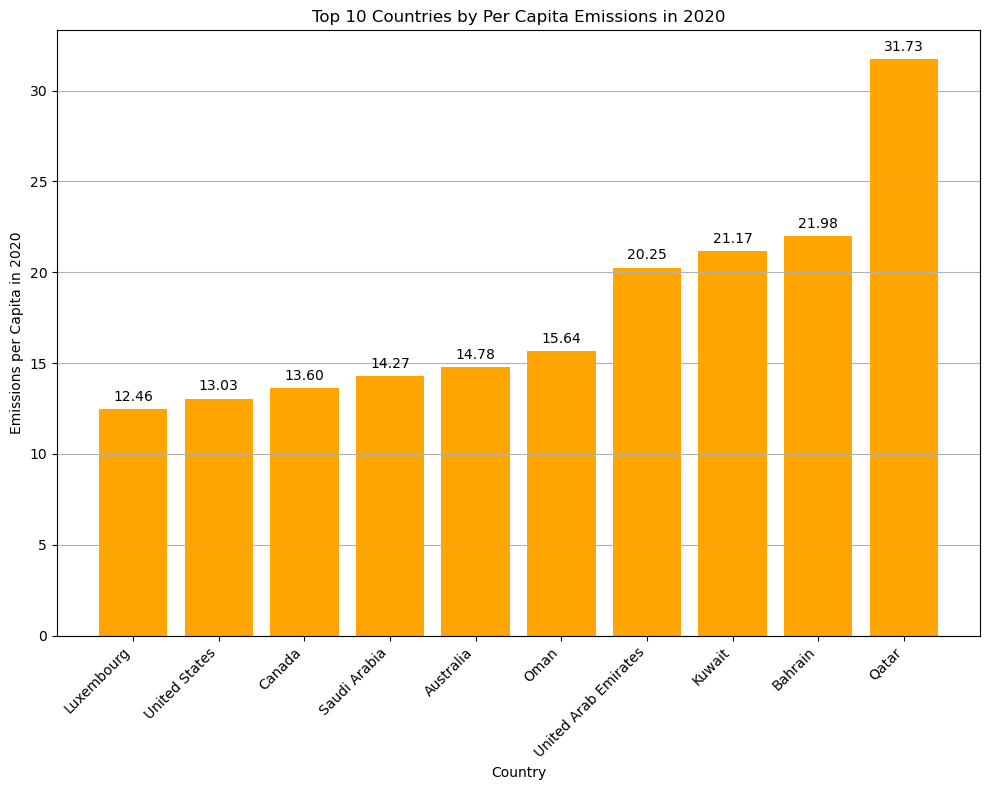

In [145]:
# Creiamo del barplot con assi invertiti
plt.figure(figsize=(10, 8))
bars = plt.bar(countries, emissions_2020, color='orange')

# Aggiungiamo etichette agli assi e titolo
plt.ylabel('Emissions per Capita in 2020')
plt.xlabel('Country')
plt.title('Top 10 Countries by Per Capita Emissions in 2020')

# Aggiungiamo valori sopra le barre
for bar, value in zip(bars, emissions_2020):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, f'{value:.2f}', ha='center', va='bottom')

# Ruotiamo i tick degli assi x per una migliore leggibilità
plt.xticks(rotation=45, ha='right')

# Mostriamo il plot
plt.gca().invert_xaxis()  # Invertiamo l'asse x per avere i paesi da sinistra a destra
plt.grid(True, axis='y')  # Aggiungiamo griglia solo sull'asse y per una migliore visualizzazione dei valori
plt.tight_layout()        # Ottimizziamo il layout del grafico
plt.show()

In [146]:
# raggruppiamo per continente le emissioni totali di CO2 del 2020
pipeline = [
    {
        '$group': {
            '_id': '$region',
            'total_emissions_2020': {'$sum': '$2020'}
        }
    },
    {
        '$sort': {'total_emissions_2020': -1}  
    }
]

result = collection.aggregate(pipeline)

print("Total emissions for 2020 grouped by region:")
for doc in result:
    print(f"Region: {doc['_id']}, Total Emissions: {doc['total_emissions_2020']}")

Total emissions for 2020 grouped by region:
Region: Asia, Total Emissions: 246.677656017052
Region: Europe, Total Emissions: 207.85568673399644
Region: Americas, Total Emissions: 114.5403229014874
Region: Africa, Total Emissions: 57.9653577209196
Region: Oceania, Total Emissions: 41.1566872662343


In [147]:
# 10 paesi con la differenza più alta di emissioni dal 1990 al 2020

# Eseguiamo la query per ottenere i dati delle emissioni del 1990 e del 2020
cursor = collection.find({}, {'name': 1, '1990': 1, '2020': 1})

# Convertiamo il cursore in un DataFrame pandas
data = pd.DataFrame(list(cursor))

# Calcoliamo la differenza tra le emissioni del 1990 e del 2020
data['difference'] = data['2020'] - data['1990']

# Troviamo i 10 paesi con la differenza minima tra le emissioni del 1990 e del 2020
top_10_max_difference = data.nsmallest(10, 'difference')

# Visualizziamo i risultati
print("\nTop 10 countries with maximum difference between 1990 and 2020 emissions:")
for index, row in top_10_max_difference.iterrows():
    print(row['name'], row['1990'], row['2020'], row['difference'])


Top 10 countries with maximum difference between 1990 and 2020 emissions:
Luxembourg 29.5534895901532 12.4569532326913 -17.0965363574619
Estonia 22.0147032770107 5.33839981587368 -16.67630346113702
Nauru 13.1589914565534 3.36175395858709 -9.79723749796631
Ukraine 13.2703858442825 3.75381618922792 -9.516569655054578
United Arab Emirates 29.0557960919948 20.2522716801426 -8.803524411852202
Moldova 10.2941087223169 3.26784636811087 -7.026262354206029
Czechia 14.8208689239845 8.30401749583889 -6.5168514281456105
United States 19.4073358624806 13.0328279519898 -6.3745079104908005
Denmark 10.1106043078901 4.69123730751634 -5.41936700037376
United Kingdom 9.81306879909312 4.60114225090135 -5.21192654819177


In [155]:
# creiamo una tabella per rendere i dati più chiari
emissions_diff = {
    "Country": ["Luxembourg", "Estonia", "Nauru", "Ukraine", "United Arab Emirates",
                "Moldova", "Czechia", "United States", "Denmark", "United Kingdom"],
    "Emissions 1990": [29.5534895901532, 22.0147032770107, 13.1589914565534,
                                         13.2703858442825, 29.0557960919948, 10.2941087223169,
                                         14.8208689239845, 19.4073358624806, 10.1106043078901, 9.81306879909312],
    "Emissions 2020": [12.4569532326913, 5.33839981587368, 3.36175395858709,
                                         3.75381618922792, 20.2522716801426, 3.26784636811087,
                                         8.30401749583889, 13.0328279519898, 4.69123730751634, 4.60114225090135],
    "Difference": [-17.0965363574619, -16.67630346113702, -9.79723749796631,
                                     -9.516569655054578, -8.803524411852202, -7.026262354206029,
                                     -6.5168514281456105, -6.3745079104908005, -5.41936700037376, -5.21192654819177]
}

table = pd.DataFrame(emissions_diff)
table

,Country,Emissions 1990,Emissions 2020,Difference
0,Luxembourg,29.553490,12.456953,-17.096536
1,Estonia,22.014703,5.338400,-16.676303
2,Nauru,13.158991,3.361754,-9.797237
3,Ukraine,13.270386,3.753816,-9.516570
4,United Arab Emirates,29.055796,20.252272,-8.803524
5,Moldova,10.294109,3.267846,-7.026262
6,Czechia,14.820869,8.304017,-6.516851
7,United States,19.407336,13.032828,-6.374508
8,Denmark,10.110604,4.691237,-5.419367
9,United Kingdom,9.813069,4.601142,-5.211927


In [149]:
# realizziamo uno scatter plot in cui mettiamo in relazione la popolazione e le emissioni totali del 2020 per paese

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
cursor = collection.find({}, {'name': 1, 'region': 1, 'population': 1, '2020': 1, '_id': 0})

In [152]:
data = pd.DataFrame(list(cursor))

In [153]:
data['total_emissions_2020'] = data['2020'] * data['population']

C:\Users\Utente\AppData\Local\Temp\ipykernel_13724\483078282.py:2: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.scatterplot(


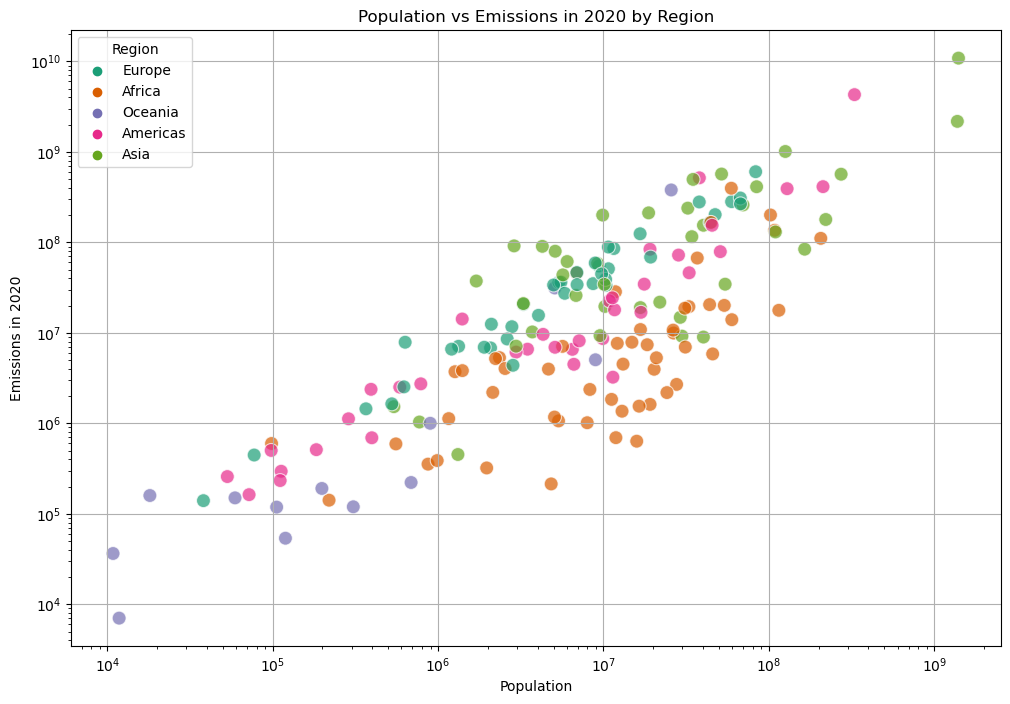

In [154]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data,
    x='population',
    y='total_emissions_2020',
    hue='region',
    palette=sns.color_palette('Dark2'),
    s=100,  # Dimensione dei punti
    edgecolor='w',  # Colore del bordo dei punti
    alpha=0.7  # Trasparenza dei punti
)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Population')
plt.ylabel('Emissions in 2020')
plt.title('Population vs Emissions in 2020 by Region')
plt.legend(title='Region')
plt.grid(True)

plt.show()